In [31]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import dabest
import osar

#NOTE: SUPPRESSES WARNINGS!

import warnings

warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter(action="default", category=RuntimeWarning)

In [47]:
basegenotype = "SS81353"
responder = "ACR"
addNotes = basegenotype + " x " + responder
#VT999036: Epoch 1
#
##CHECK DRIVE LETTER
filedirectory = "D:\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\OSAR\\"

baseDirectory = filedirectory + addNotes

#### sets up filename for later - make sure this is correct

if len(addNotes) > 0:
    addNotes = "_" + addNotes   
#filename = baseDirectory + "/" + str(baseDirectory).split("/", -1)[-1][7:] 
filename = baseDirectory + "\\" + basegenotype
filename_AppendDT = "_gen " + dt.datetime.today().strftime('%Y-%m-%d')

##### use this if you need to set filename manually
#filename = baseDirectory + "/" + "201230 R58E02-LexA;VT999036-Gal4 x Dop2R-RNAi;LexAOP-Chrimson_Female"

filename = filename + addNotes + filename_AppendDT

filename

'D:\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\OSAR\\SS81353 x ACR\\SS81353_SS81353 x ACR_gen 2024-05-14'

In [48]:
if responder == "Chrimson2":
    light_color = "deeppink"
    colors = "Reds"
    
if responder == "ACR":
    light_color = "dodgerblue"
    colors = "Greens"
    
my_color_palette3 = {"Eighth; Sibling" : "lightgray",
                      "Eighth; Offspring"    : light_color,
                    "Quarter; Sibling" : "lightgray",
                      "Quarter; Offspring"    : light_color, 
                     "Half; Sibling" : "lightgray",
                      "Half; Offspring"    : light_color,
                     "Full; Sibling" : "lightgray",
                      "Full; Offspring"    : light_color
                     }
    

In [49]:
#check for border shift
osarAnalysis = osar.osar(baseDirectory,
                        # border_shift_mm = 1.5,  
                        # countlog_folder = "countlog_Full Only",         
                        # countlog_folder = "countlog_Half and Full",
                         driver = basegenotype)

Creating borders for each fly...
Done.

Processing CSV 60 of 60
Summarising results for all flies...
All done.


c:\Users\user\anaconda3\lib\site-packages\dabest\plotter.py:563: UserWarning: FixedFormatter should only be used together with FixedLocator
  rawdata_axes.set_xticklabels(ticks_with_counts)


DABEST v2023.02.14
                  
Good afternoon!
The current time is Tue May 14 17:02:35 2024.

The unpaired mean difference between Eighth; Sibling and Eighth; Offspring is 0.401 [95%CI -0.133, 0.829].
The p-value of the two-sided permutation t-test is 0.0356, calculated for legacy purposes only. 

The unpaired mean difference between Quarter; Sibling and Quarter; Offspring is 0.0353 [95%CI -0.236, 0.328].
The p-value of the two-sided permutation t-test is 0.821, calculated for legacy purposes only. 

The unpaired mean difference between Half; Sibling and Half; Offspring is -0.144 [95%CI -0.41, 0.134].
The p-value of the two-sided permutation t-test is 0.253, calculated for legacy purposes only. 

The unpaired mean difference between Full; Sibling and Full; Offspring is -0.0813 [95%CI -0.303, 0.195].
The p-value of the two-sided permutation t-test is 0.507, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and acce

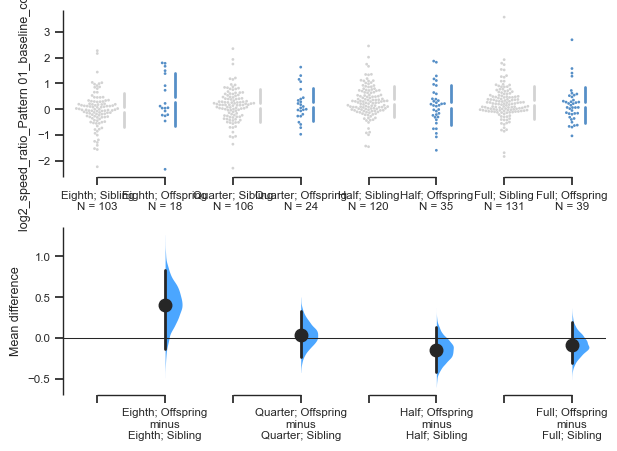

In [50]:
speedratio2 = osarAnalysis.contrasts.log2_speed_ratio.light_speed_against_dark_speed(epoch='first')

speedratio2.mean_diff.plot(raw_marker_size=2, custom_palette = my_color_palette3, legend_kwargs=None, fig_size=(7,5)
                          )

#, swarm_ylim = (-20, 10), contrast_ylim = (-1, 1)

sns.set(font_scale=0.7, style='ticks')
speedratio2.mean_diff

c:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\user\anaconda3\lib\site-packages\dabest\plotter.py:563: UserWarning: FixedFormatter should only be used together with FixedLocator
  rawdata_axes.set_xticklabels(ticks_with_counts)


DABEST v2023.02.14
                  
Good afternoon!
The current time is Tue May 14 17:02:40 2024.

The unpaired mean difference between Eighth; Sibling and Eighth; Offspring is -0.18 [95%CI -0.416, 0.0755].
The p-value of the two-sided permutation t-test is 0.104, calculated for legacy purposes only. 

The unpaired mean difference between Quarter; Sibling and Quarter; Offspring is -0.0592 [95%CI -0.283, 0.175].
The p-value of the two-sided permutation t-test is 0.582, calculated for legacy purposes only. 

The unpaired mean difference between Half; Sibling and Half; Offspring is 0.068 [95%CI -0.133, 0.286].
The p-value of the two-sided permutation t-test is 0.468, calculated for legacy purposes only. 

The unpaired mean difference between Full; Sibling and Full; Offspring is 0.143 [95%CI -0.0447, 0.331].
The p-value of the two-sided permutation t-test is 0.0784, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and acc

c:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


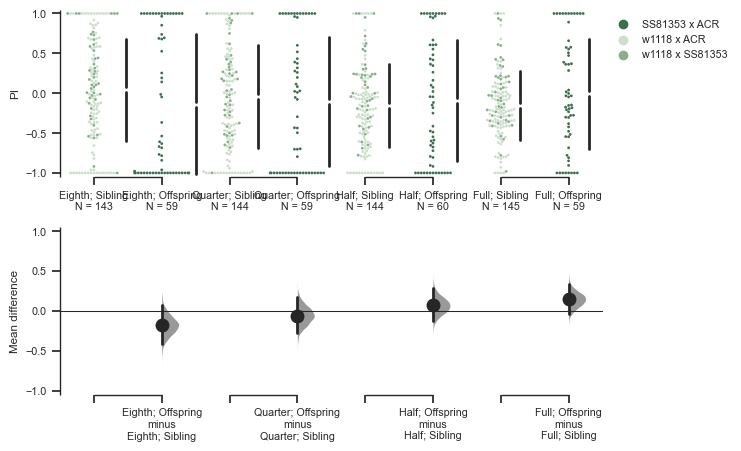

In [51]:
osarAnalysis_PI = osarAnalysis.contrasts.pi.time_spent_in_light(baseline_corrected="False", epoch='first')

osarFig_PI_Meandiff = osarAnalysis_PI.mean_diff.plot(color_col='genotype', 
                               swarm_ylim=(-1.05,1.05),
                               contrast_ylim=(-1.05,1.05),
                             custom_palette= colors,
                               fig_size=(7,5),
                               #fig_size=(10,7),
                               swarm_label="PI",
                               raw_marker_size= 2 )
sns.set(font_scale=0.75)
osarAnalysis_PI.mean_diff

In [25]:
#osarFig_PI_Meandiff.savefig(filename + '.png', bbox_inches="tight", dpi=300)